# Replication Assigment - The Long Term Effect of Africa’s Slave Trade

Replication Work by Jonatan Blank Hall

### Libraries
In order to read the STATA database, fit the IV model and Plot the graphs, we use he following libraries:

In [1]:
#if the libraries are not installed, run these:

#!pip install numpy
#!pip install pandas
#!pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
from linearmodels.iv import IV2SLS

### Routes
It is useful to set the routes for the raw data and the route to save the processed data

In [2]:
routes = {
    'slave_trade_data': '../data/slave_trade_QJE.dta'
}

### Data
In this section data will be read using the library "pandas", and the structure will be explored

In [3]:
slave_db = pd.read_stata(routes['slave_trade_data'])

#### Data Overview
We see the over-all structure of the data

In [4]:
slave_db.head()

,isocode,country,ln_maddison_pcgdp2000,ln_export_area,ln_export_pop,colony0,colony1,colony2,colony3,colony4,...,ln_avg_oil_pop,ln_avg_all_diamonds_pop,ln_pop_dens_1400,atlantic_distance_minimum,indian_distance_minimum,saharan_distance_minimum,red_sea_distance_minimum,ethnic_fractionalization,state_dev,land_area
0,AGO,Angola,6.670766,7.967494,14.399250,0.0,0.0,0.0,1.0,0.0,...,0.643126,-1.701396,-0.024917,5.668760,6.980571,4.925892,3.872354,0.7867,0.635,1.2500
1,BDI,Burundi,6.354370,1.140843,4.451658,0.0,0.0,0.0,0.0,1.0,...,-9.210340,-6.907755,3.036856,10.626214,2.570375,3.718742,2.215324,0.2951,0.995,0.0278
2,BEN,Benin,7.187657,8.304137,13.308970,0.0,0.0,1.0,0.0,0.0,...,-3.531555,-6.907755,1.214196,5.120652,9.233961,2.834785,3.901736,0.7872,0.695,0.1130
3,BFA,Burkina Faso,6.748760,6.413822,11.724286,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-6.907755,0.908565,4.774938,9.299419,2.763519,4.239375,0.7377,0.338,0.2740
4,BWA,Botswana,8.377471,-2.302585,3.912023,0.0,1.0,0.0,0.0,0.0,...,-9.210340,2.186849,-2.075029,5.686335,5.764575,5.856533,4.299600,0.4102,0.893,0.6000


In [5]:
slave_db.describe()

,ln_maddison_pcgdp2000,ln_export_area,ln_export_pop,colony0,colony1,colony2,colony3,colony4,colony5,colony6,...,ln_avg_oil_pop,ln_avg_all_diamonds_pop,ln_pop_dens_1400,atlantic_distance_minimum,indian_distance_minimum,saharan_distance_minimum,red_sea_distance_minimum,ethnic_fractionalization,state_dev,land_area
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,47.000000,52.000000
mean,7.133544,3.259615,9.263513,0.038462,0.346154,0.403846,0.096154,0.057692,0.019231,0.019231,...,-6.714771,-5.490106,0.110671,7.380799,6.934247,3.511205,3.445517,0.630041,0.580383,0.578238
std,0.825317,3.894839,3.682379,0.194184,0.480385,0.495454,0.297678,0.235435,0.138675,0.138675,...,4.030914,2.396281,1.333923,3.280256,4.238689,1.567817,1.466612,0.251408,0.329134,0.646256
min,5.384495,-2.302585,3.912023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.210340,-6.907755,-2.302585,3.646842,0.031910,0.309734,0.064390,0.000000,0.000000,0.000455
25%,6.522827,-1.104635,4.667323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.210340,-6.907755,-0.594635,5.072046,2.667340,2.733061,2.283090,0.440400,0.327000,0.051625
50%,6.966673,4.370506,10.409948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.210340,-6.907755,0.191618,5.699416,8.145161,3.355966,3.521949,0.723500,0.635000,0.332000
75%,7.714463,6.555175,12.346280,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-4.249236,-4.217894,0.983175,9.797528,9.537068,4.681708,4.459597,0.809950,0.859500,0.929250
max,9.273503,8.818254,14.399250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.235896,2.186849,3.036856,16.392658,16.775434,6.637325,6.465437,0.930200,1.000000,2.510000


In [5]:
slave_db.columns

Index(['isocode', 'country', 'ln_maddison_pcgdp2000', 'ln_export_area',
       'ln_export_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w',
       'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'ethnic_fractionalization', 'state_dev', 'land_area'],
      dtype='object')

#### Dummy Columns
Some columns can be seemed as dummy variables. It can be useful to identify them and properly manage them as so. Namely, these columns are:
- colony0 : not colonized
- colony1 : britain
- colony2 : france
- colony3 : portugal
- colony4 : belgium
- colony5 : spain
- colony6 : UN
- colony7 : Italy
- island_dum : indicator variable for small islands
- legor_fr : Legal Origin France
- logor_uk : Legal Origin British
- region_n : Region North
- region_s : Region South
- region_w : Region West
- region_e : Region East
- region_c : Region Central

### Relationships

In [6]:
slave_db.columns

Index(['isocode', 'country', 'ln_maddison_pcgdp2000', 'ln_export_area',
       'ln_export_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w',
       'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'ethnic_fractionalization', 'state_dev', 'land_area'],
      dtype='object')

#### Linear regression graph

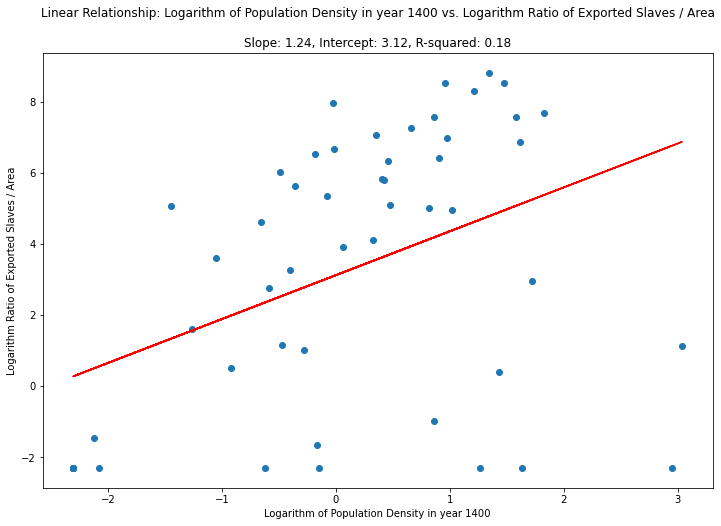

In [8]:
#INPUTS
var1 = 'ln_pop_dens_1400'
var2 = 'ln_export_area'
base = slave_db

#Specifics
name_var1 = 'Logarithm of Population Density in year 1400'
name_var2 = 'Logarithm Ratio of Exported Slaves / Area'

# Fit Linear Regression
# np.polyfit returns the coefficients [slope, intercept] of the fitted model
slope, intercept = np.polyfit(base[var1], base[var2], 1)

# Calculate predictions for the regression line
regression_line = slope * base[var1] + intercept

# Calculate R-squared
correlation_matrix = np.corrcoef(base[var1], base[var2])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

#Plot
plt.figure(figsize = (12,8))
plt.title(f"Linear Relationship: {name_var1} vs. {name_var2}\n \n"
         f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_squared:.2f}")
plt.plot(base[var1],base[var2],'o')
plt.plot(base[var1], regression_line, 'r', label='Fitted line')
plt.xlabel(name_var1)
plt.ylabel(name_var2)
plt.show()

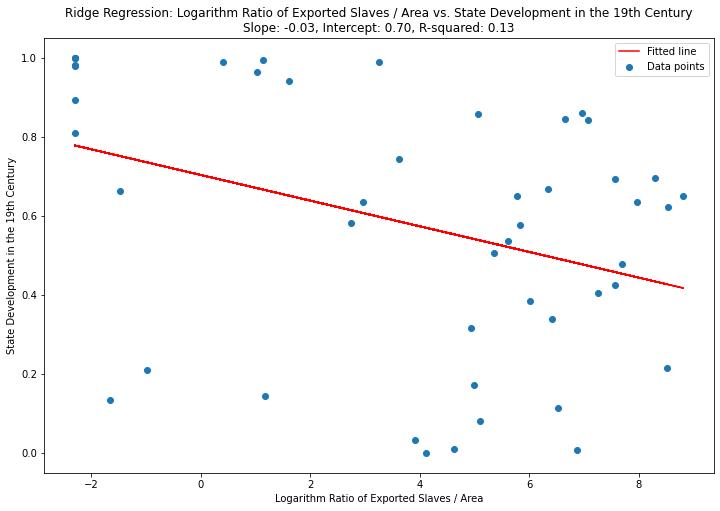

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming slave_db is your DataFrame and is already defined
# Example: slave_db = pd.DataFrame({'ln_pop_dens_1400': np.random.rand(10), 'ln_export_area': np.random.rand(10)})

var1 = 'ln_export_area'
var2 = 'state_dev'
base = slave_db.dropna()

name_var1 = 'Logarithm Ratio of Exported Slaves / Area'
name_var2 = 'State Development in the 19th Century'

# Reshape data for model
X = base[var1].values.reshape(-1, 1)
y = base[var2].values

# Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X, y)

# Calculate predictions for the regression line
regression_line = ridge_model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, regression_line)

# Extract slope and intercept for plotting and interpretation
slope = ridge_model.coef_[0]
intercept = ridge_model.intercept_

# Plot
plt.figure(figsize=(12, 8))
plt.title(f"Ridge Regression: {name_var1} vs. {name_var2}\n"
          f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_squared:.2f}")
plt.scatter(X, y, label='Data points')
plt.plot(X, regression_line, 'r', label='Fitted line')
plt.xlabel(name_var1)
plt.ylabel(name_var2)
plt.legend()
plt.show()


### Regressions

In [9]:
slave_db.columns

Index(['isocode', 'country', 'ln_maddison_pcgdp2000', 'ln_export_area',
       'ln_export_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w',
       'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'ethnic_fractionalization', 'state_dev', 'land_area'],
      dtype='object')

Regression 1: Simple regression

In [10]:
data = slave_db

X = data[['ln_export_area','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7']]
X = sm.add_constant(X)

y = data['ln_maddison_pcgdp2000']

model1 = sm.OLS(y,X).fit()

Regression 2: Colony and Geographical Control

In [11]:
data = slave_db

X = data[['ln_export_area','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]
X = sm.add_constant(X)

y = data['ln_maddison_pcgdp2000']

model2 = sm.OLS(y,X).fit()

Regression 3: Drop Islands and North African Countries

In [12]:
data = slave_db

#drop countries
drop_countries = ['Morocco','Algeria','Tunisia','Libya','Egypt','Seychelles','Mauritius','Comoros','Sao Tome & Principe',
                 'Cape Verde Islands']


data = data[~data['country'].isin(drop_countries)]

X = data[['ln_export_area','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']]
X = sm.add_constant(X)

y = data['ln_maddison_pcgdp2000']

model3 = sm.OLS(y,X).fit()

Regression 4: Island and North Africa dummy, Islam and French Law Control

In [13]:
data = slave_db

X = data[['ln_export_area','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
         'island_dum','islam', 'legor_fr', 'region_n']]
X = sm.add_constant(X)

y = data['ln_maddison_pcgdp2000']

model4 = sm.OLS(y,X).fit()

Regression 5: Control for Natural Endowments

In [14]:
data = slave_db

X = data[['ln_export_area','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
         'island_dum','islam', 'legor_fr', 'region_n',
         'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop']]
X = sm.add_constant(X)

y = data['ln_maddison_pcgdp2000']

model5 = sm.OLS(y,X).fit()

Regression 6: All control with droping Islands and North Africa

In [16]:
data = slave_db

#drop countries
drop_countries = ['Morocco','Algeria','Tunisia','Libya','Egypt','Seychelles','Mauritius','Comoros','Sao Tome & Principe',
                 'Cape Verde Islands']

data = data[~data['country'].isin(drop_countries)]

X = data[['ln_export_area','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
         'islam', 'legor_fr','ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop']]
X = sm.add_constant(X)

y = data['ln_maddison_pcgdp2000']

model6 = sm.OLS(y,X).fit()

Table

In [17]:
def compile_results_table(models, variable_list):
    # Initialize an empty DataFrame for the results
    # Rows correspond to variables, plus additional rows for new metrics
    extended_variable_list = variable_list + ['Colonizer fixed effects', 'Number obs.', 'R2']
    results_df = pd.DataFrame(index=extended_variable_list, columns=[f'Model {i+1}' for i in range(len(models))])

    # Iterate through each model to populate the DataFrame
    for i, model in enumerate(models):
        for var in variable_list:
            # Check if the variable is in the model
            if var in model.params.index:
                coef = model.params[var]
                std_err = model.bse[var]
                p_value = model.pvalues[var]

                # Determine significance
                significance = '***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.1 else ''

                # Format the string for the cell: "coef (std_err) significance"
                results_df.loc[var, f'Model {i+1}'] = f"{coef:.3f} {significance}\n({std_err:.3f})"
            else:
                # Leave blank if the variable is not in the model
                results_df.loc[var, f'Model {i+1}'] = ""

        # Add the fixed effects, number of observations, and R2 for each model
        results_df.loc['Colonizer fixed effects', f'Model {i+1}'] = "Yes"
        results_df.loc['Number obs.', f'Model {i+1}'] = f"{int(model.nobs)}"
        results_df.loc['R2', f'Model {i+1}'] = f"{model.rsquared:.3f}"

    return results_df

In [18]:
models = [model1,model2,model3,model4,model5,model6]
variables = ['ln_export_area','abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
         'island_dum','islam', 'legor_fr', 'region_n',
         'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop']
results_table = compile_results_table(models,variables)

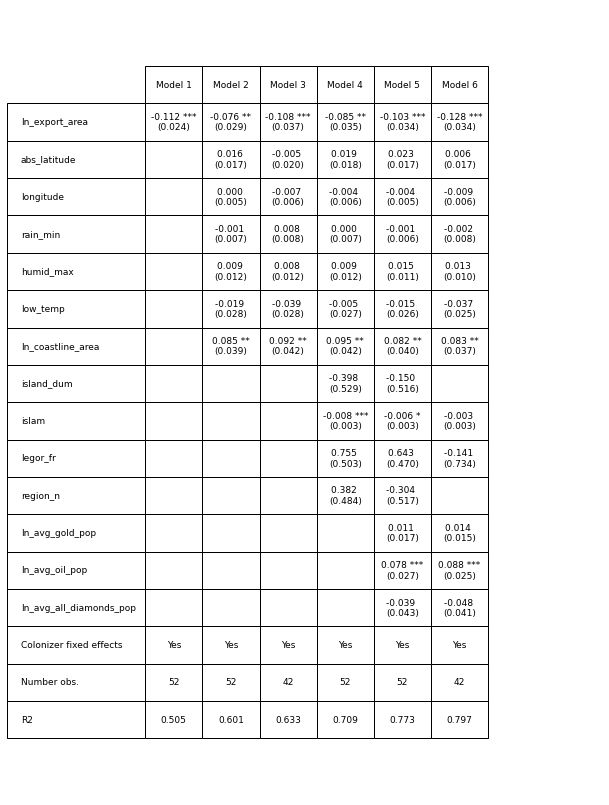

In [19]:
# Define page size (A4 in inches, for example)
page_width, page_height = 8.27, 11.69  # Adjust as needed for different page size

# Create a figure with A4 page size
fig, ax = plt.subplots(figsize=(page_width, page_height))

# Hide the axes
ax.axis('off')

# Add the table at the bottom of the axes
the_table = ax.table(cellText=results_table.values,
                     colLabels=results_table.columns,
                     rowLabels=results_table.index,
                     cellLoc='center', loc='center',
                     colWidths=[0.1]*len(results_table.columns))  # Adjust column widths as needed

# Scale the table to the figure size
the_table.scale(1, 2.5)  # You might need to adjust scaling factors to fit the page

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.02, right=0.98, top=0.96, bottom=0.02)

# Save the figure with high resolution
plt.savefig('full_page_table_image.png', bbox_inches='tight', dpi=300)